<a href="https://colab.research.google.com/github/MercadoMR/AITraining/blob/main/OCR_Basic_tesseract2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,073 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [ ]:
import pytesseract
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt


# OCR

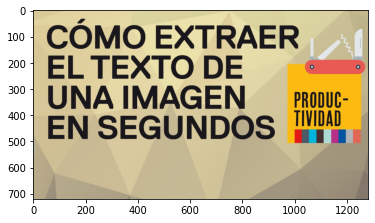

In [ ]:
im = cv2.imread("img1.jpg", cv2.IMREAD_COLOR)#BGR
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
#im = cv2.rectangle(im, (50,50), (1020,500), (0,255,0),5)
#im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(im, cmap="gray")
plt.show()

In [ ]:
extract = pytesseract.image_to_string(im)
extract

'COMO EXTRAER\n\nEL TEXTO DE\n\nUNA IMAGEN a\nEN SEGUNDOS\n\x0c'

In [ ]:
extract=extract.split('\n')
extract

['COMO EXTRAER', '', 'EL TEXTO DE', '', 'UNA IMAGEN a', 'EN SEGUNDOS', '\x0c']

In [ ]:
l=list()
for i in extract:
  if i!='' and i!=' ':
    l.append(i)
l

['COMO EXTRAER', 'EL TEXTO DE', 'UNA IMAGEN a', 'EN SEGUNDOS', '\x0c']

In [ ]:
print(pytesseract.image_to_boxes(im))

C 53 572 129 662 0
O 139 572 205 663 0
M 237 573 285 661 0
O 344 572 403 663 0
E 470 573 516 661 0
X 541 573 592 661 0
T 620 573 667 661 0
R 702 573 747 661 0
A 780 573 828 661 0
E 866 573 903 661 0
R 942 573 1016 661 0
E 58 458 118 547 0
L 134 458 194 547 0
T 220 458 293 547 0
E 305 458 358 547 0
X 374 458 433 547 0
T 453 458 502 547 0
O 528 457 598 548 0
D 653 458 699 547 0
E 737 458 799 547 0
U 58 342 118 432 0
N 118 342 129 432 0
A 183 343 301 432 0
I 346 343 363 432 0
M 403 343 473 432 0
A 484 343 537 432 0
G 563 342 618 433 0
E 658 343 693 432 0
N 734 343 809 432 0
a 972 213 1269 530 0
E 58 229 120 317 0
N 134 228 209 317 0
S 249 227 323 318 0
E 334 229 396 317 0
G 414 227 486 318 0
U 500 227 564 317 0
N 588 228 645 317 0
D 679 229 726 317 0
O 726 229 752 317 0
S 801 227 924 318 0



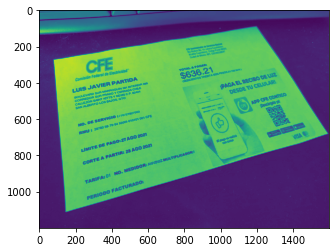

' \n\x0c'

In [ ]:
im = cv2.imread("cfe.jpeg", cv2.IMREAD_COLOR)
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(im)
plt.show()
extract = pytesseract.image_to_string(im)
extract

# Ejemplo 2

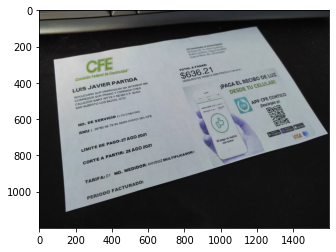

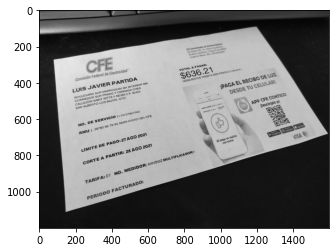

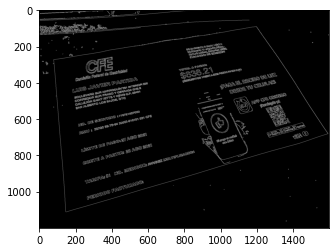

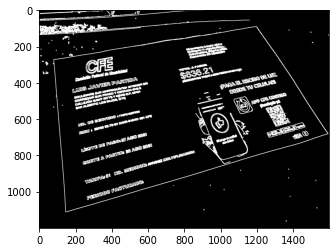

In [ ]:
image = cv2.imread('cfe.jpeg')
plt.imshow(image)
plt.show()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')
plt.show()

canny = cv2.Canny(gray, 10, 150)
plt.imshow(canny,cmap='gray')
plt.show()

canny = cv2.dilate(canny, None, iterations=1)
plt.imshow(canny,cmap='gray')
plt.show()

In [ ]:
def ordenar_puntos(puntos):
    n_puntos = np.concatenate([puntos[0], puntos[1], puntos[2], puntos[3]]).tolist()
    y_order = sorted(n_puntos, key=lambda n_puntos: n_puntos[1])
    x1_order = y_order[:2]
    x1_order = sorted(x1_order, key=lambda x1_order: x1_order[0])
    x2_order = y_order[2:4]
    x2_order = sorted(x2_order, key=lambda x2_order: x2_order[0])
    
    return [x1_order[0], x1_order[1], x2_order[0], x2_order[1]]

[[[1595  677]]

 [[1200   90]]

 [[  79  272]]

 [[ 147 1112]]]


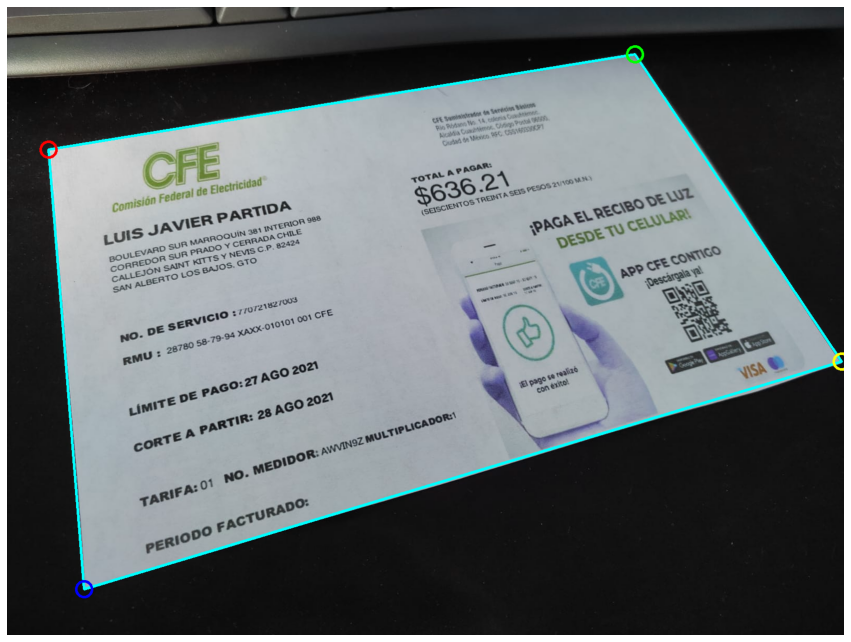

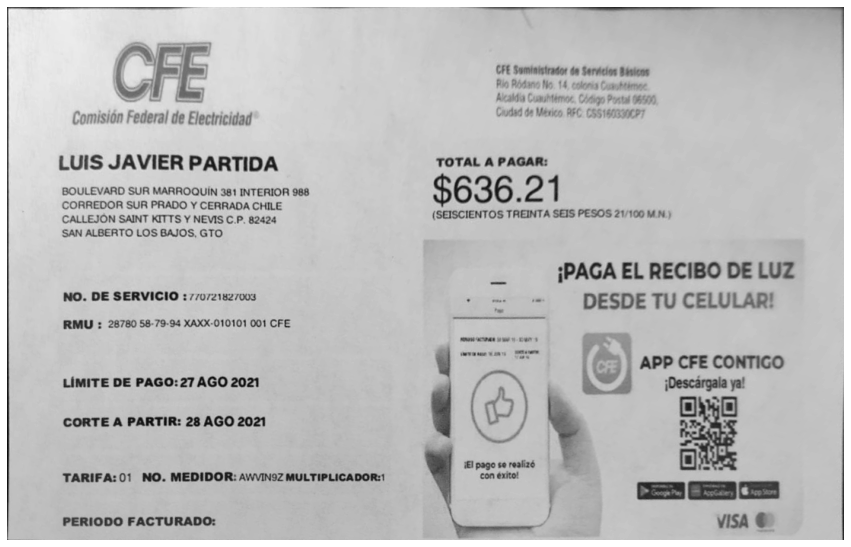

In [ ]:
cnts = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:1]

for c in cnts:
    epsilon = 0.01*cv2.arcLength(c,True)
    approx = cv2.approxPolyDP(c,epsilon,True)
    print(approx)
    
    if len(approx)==4:
        cv2.drawContours(image, [approx], 0, (0,255,255),4)
        
        puntos = ordenar_puntos(approx)
        cv2.circle(image, tuple(puntos[0]), 15, (255,0,0), 4)
        cv2.circle(image, tuple(puntos[1]), 15, (0,255,0), 4)
        cv2.circle(image, tuple(puntos[2]), 15, (0,0,255), 4)
        cv2.circle(image, tuple(puntos[3]), 15, (255,255,0), 4)

        fig = plt.figure( figsize=(15, 15))
        plt.imshow(image)
        plt.axis("off")
        plt.show()

        pts1 = np.float32(puntos)
        pts2 = np.float32([[0,0],[1100,0],[0,700],[1100,700]])

        M = cv2.getPerspectiveTransform(pts1,pts2)
        dst = cv2.warpPerspective(gray,M,(1100,700))

        fig = plt.figure( figsize=(15, 15))
        plt.imshow(dst,cmap='gray')
        plt.axis("off")
        plt.show()




In [ ]:
texto=pytesseract.image_to_string(dst)

In [ ]:
pytesseract.image_to_string(dst)

' \n\nComision Federal de Electricidad\n\nLUIS JAVIER PARTIDA\n\nBOULEVARD SUR MARROQUIN 381 INTERIOR 988\nCORREDOR SUR PRADO Y CERRADA CHILE\nCALLEJON SAINT KITTS Y NEVIS C.P. 82424\n\nSAN ALBERTO LOS BAJOS, GTO\n\nNO. DE SERVICIO : 770721827003\n\nRMU : 28780 58-79-94 XAXX-010101 001 CFE\n\nLIMITE DE PAGO: 27 AGO 2021\n\nCORTE A PARTIR: 28 AGO 2021\n\nTARIFA:01 NO. MEDIDOR: AWVINOZ MULTIPLICADOR:1\n\nPERIODO FACTURADO:\n\nCHE Suminintrador de Seracion Basicos\nPlo Rihana Mo. 14, colon\nAvaldia Cunuhtierna wh\nCudsd de Merion\n\n \n  \n\nTOTAL A PAGAR:\n\n$636.21\n\n(SEISCIENTOS TREINTA SEIS PESOS 21/100 MM)\n\niPAGA EL RECIBO DE LUZ\nDESDE TU CELULAR!\n\n \n\n(©\n\n‘con éxito!\n\n \n\x0c'

In [ ]:
print(texto)

 

Comision Federal de Electricidad

LUIS JAVIER PARTIDA

BOULEVARD SUR MARROQUIN 381 INTERIOR 988
CORREDOR SUR PRADO Y CERRADA CHILE
CALLEJON SAINT KITTS Y NEVIS C.P. 82424

SAN ALBERTO LOS BAJOS, GTO

NO. DE SERVICIO : 770721827003

RMU : 28780 58-79-94 XAXX-010101 001 CFE

LIMITE DE PAGO: 27 AGO 2021

CORTE A PARTIR: 28 AGO 2021

TARIFA:01 NO. MEDIDOR: AWVINOZ MULTIPLICADOR:1

PERIODO FACTURADO:

CHE Suminintrador de Seracion Basicos
Plo Rihana Mo. 14, colon
Avaldia Cunuhtierna wh
Cudsd de Merion

 
  

TOTAL A PAGAR:

$636.21

(SEISCIENTOS TREINTA SEIS PESOS 21/100 MM)

iPAGA EL RECIBO DE LUZ
DESDE TU CELULAR!

 

(©

‘con éxito!

 



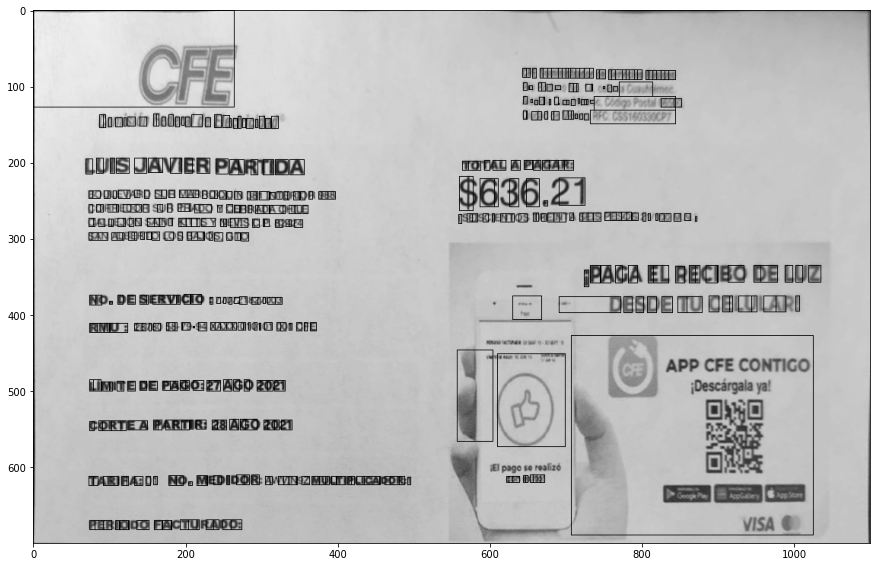

In [ ]:
h, w = dst.shape
boxes = pytesseract.image_to_boxes(dst)
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(dst, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 1)

fig = plt.figure( figsize=(15, 15))
plt.imshow(img,cmap="gray")

In [ ]:
texto2=texto.split('\n')
text=[]
for i in texto2:
  if i!='' and i!=' ':
    text.append(i.strip("‘"))
text

['Comision Federal de Electricidad',
 'LUIS JAVIER PARTIDA',
 'BOULEVARD SUR MARROQUIN 381 INTERIOR 988',
 'CORREDOR SUR PRADO Y CERRADA CHILE',
 'CALLEJON SAINT KITTS Y NEVIS C.P. 82424',
 'SAN ALBERTO LOS BAJOS, GTO',
 'NO. DE SERVICIO : 770721827003',
 'RMU : 28780 58-79-94 XAXX-010101 001 CFE',
 'LIMITE DE PAGO: 27 AGO 2021',
 'CORTE A PARTIR: 28 AGO 2021',
 'TARIFA:01 NO. MEDIDOR: AWVINOZ MULTIPLICADOR:1',
 'PERIODO FACTURADO:',
 'CHE Suminintrador de Seracion Basicos',
 'Plo Rihana Mo. 14, colon',
 'Avaldia Cunuhtierna wh',
 'Cudsd de Merion',
 '  ',
 'TOTAL A PAGAR:',
 '$636.21',
 '(SEISCIENTOS TREINTA SEIS PESOS 21/100 MM)',
 'iPAGA EL RECIBO DE LUZ',
 'DESDE TU CELULAR!',
 '(©',
 'con éxito!',
 '\x0c']

In [ ]:
import re
for linea in text:
  pago = re.search("PAG[O0]:", linea)
  if pago:
    fecha = linea[pago.span()[1]:].strip()
    print(fecha)
  pesos = re.search("\$", linea)
  if pesos:
    monto = linea[pesos.span()[0]:]
    print(monto)

print("Tienes que pagar:", monto, "antes del:", fecha)

27 AGO 2021
$636.21
Tienes que pagar: $636.21 antes del: 27 AGO 2021


In [ ]:
!python -m spacy download es_core_news_md
import spacy
import es_core_news_md
nlp = es_core_news_md.load()

     |████████████████████████████████| 78.4 MB 1.3 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_md')


In [ ]:
for linea in text:
  doc = nlp(linea)
  for ent in doc.ents:
    print(ent.text, "-->", ent.label_)

Comision Federal de Electricidad --> ORG
LUIS JAVIER PARTIDA --> PER
BOULEVARD SUR --> LOC
CERRADA CHILE --> ORG
CALLEJON SAINT KITTS --> PER
SAN ALBERTO LOS BAJOS --> LOC
GTO --> LOC
RMU --> ORG
LIMITE --> MISC
CORTE A --> ORG
TARIFA:01 NO --> MISC
AWVINOZ MULTIPLICADOR:1 --> MISC
FACTURADO --> MISC
CHE Suminintrador --> PER
Seracion Basicos --> PER
Plo Rihana Mo --> PER
Avaldia Cunuhtierna --> PER
Cudsd --> LOC
Merion --> LOC
A PAGAR --> MISC
TU CELULAR --> MISC


In [ ]:
import pickle

with open('names_classifier.pickle', "rb") as f:
    clf = pickle.load(f)

In [ ]:
indexes = []
max= 0
nombre =""
text=["CALLEJON SAINT KITTS"]
for i, text_line in enumerate(text):
    prediction = clf.predict_proba([text_line])
    if prediction[0][0]>max:
      max = prediction[0][0]
      nombre = text_line
      print(nombre, "-->", max )

CALLEJON SAINT KITTS --> 6.124655223162875e-08


In [ ]:
print(nombre, "recuerda que tienes que pagar:", monto, "antes del:" ,fecha)

LUIS JAVIER PARTIDA recuerda que tienes que pagar: $636.21 antes del: 27 AGO 2021
